In [1]:
import array
import random
import numpy
import matplotlib.pyplot as plt

In [2]:
pip install deap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 KB 1.8 MB/s eta 0:00:00


In [3]:
from deap import algorithms
from deap import base
from deap import benchmarks
from deap import creator
from deap import tools

In [4]:
IND_SIZE = 10
MIN_VALUE = -10
MAX_VALUE = 10
MIN_STRATEGY = -1
MAX_STRATEGY = 1

In [5]:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", array.array, typecode="d", fitness=creator.FitnessMin, strategy=None)
creator.create("Strategy", array.array, typecode="d")

In [6]:
# Individual generator
def generateES(icls, scls, size, imin, imax, smin, smax):
    ind = icls(random.uniform(imin, imax) for _ in range(size))
    ind.strategy = scls(random.uniform(smin, smax) for _ in range(size))
    return ind

In [7]:
def checkStrategy(minstrategy):
    def decorator(func):
        def wrappper(*args, **kargs):
            children = func(*args, **kargs)
            for child in children:
                for i, s in enumerate(child.strategy):
                    if s < minstrategy:
                        child.strategy[i] = minstrategy
            return children
        return wrappper
    return decorator

In [8]:
import numpy as np

def sumXExp2(x):
  sumX = 0  
  for value in x:
    sumX += np.power(value, 2)
  return sumX

def sumSinExp2Modx(x):
  sumX = 0
  for value in x:
    sumX += pow(np.sin(np.sqrt(abs(value))),2)
  return sumX

def term1Left(x):
  sum = 0
  for value in x:
    sum += pow(np.sin(value),2) - np.exp(-(sumXExp2(x)))
  return sum

def xinSheYangN4(x):
  value = term1Left(x) * np.exp(-(sumSinExp2Modx(x)))
  return (value,)

In [9]:
toolbox = base.Toolbox()
toolbox.register("individual", generateES, creator.Individual, creator.Strategy,
    IND_SIZE, MIN_VALUE, MAX_VALUE, MIN_STRATEGY, MAX_STRATEGY)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("mate", tools.cxUniform, indpb=0.3)
toolbox.register("mutate", tools.mutESLogNormal, c=1.0, indpb=0.03)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", xinSheYangN4)

toolbox.decorate("mate", checkStrategy(MIN_STRATEGY))
toolbox.decorate("mutate", checkStrategy(MIN_STRATEGY))

gen	nevals	avg      	std     	min       	max     
0  	30    	0.0791731	0.135478	0.00116648	0.644865
1  	184   	0.017046 	0.0164019	0.00116648	0.0614379
2  	186   	0.00462927	0.0037985	0.000743877	0.0198642
3  	178   	0.00197571	0.00132208	0.000646159	0.00600862
4  	184   	0.00108067	0.00045798	0.00028094 	0.002276  
5  	170   	0.000719611	0.000229827	0.000272749	0.00121815
6  	171   	0.00050692 	0.000144826	0.000272512	0.000843952
7  	182   	0.000369133	8.64453e-05	0.000272512	0.000642828
8  	179   	0.000310354	4.31981e-05	0.000272512	0.000422762
9  	167   	0.000290128	2.4712e-05 	0.000272512	0.000389152
10 	182   	0.000277094	9.67529e-06	0.000272512	0.000302181
11 	181   	0.000273438	4.88919e-06	0.000270052	0.000299513
12 	184   	0.000271666	4.39128e-06	0.00024826 	0.000272749
13 	179   	0.000269584	7.70204e-06	0.00024826 	0.000272749
14 	183   	0.000269258	7.69099e-06	0.00024826 	0.000272512
15 	179   	0.000264327	9.71649e-06	0.000248015	0.000272512
16 	183   	0.00025684 	9.31339e-06

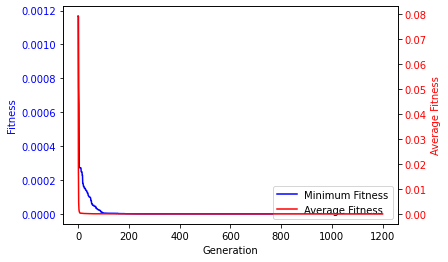

Best individual is Individual('d', [3.1415756072706467, -3.1414699218593873, -3.140533469527563, 3.1411900050016537, -3.142855869494619, 3.1397379390350664, -3.1427350097769073, -3.1423701479686503, 3.1415739907998304, -0.0001302523884823921]), fitness: (1.4627159720061656e-09,)
gen	nevals	avg      	std     	min       	max     
0  	30    	0.0580158	0.064053	0.00302217	0.286276
1  	177   	0.0158291	0.00756473	0.00302217	0.0380429
2  	178   	0.00859186	0.00488664	0.00233917	0.0194837
3  	186   	0.00538051	0.0031113 	0.00140826	0.0144879
4  	173   	0.00263634	0.00106345	0.000564578	0.0056231
5  	184   	0.00151879	0.000740622	0.000564478	0.00398441
6  	183   	0.000960685	0.000293016	0.000607537	0.00194055
7  	179   	0.0007781  	0.000107111	0.000607537	0.000950414
8  	179   	0.000666934	0.0001146  	0.000454715	0.000924296
9  	174   	0.000526734	9.87306e-05	0.000352424	0.000742067
10 	183   	0.000437442	5.51701e-05	0.000306739	0.0005631  
11 	177   	0.000383869	5.60551e-05	0.000294232	0.0004

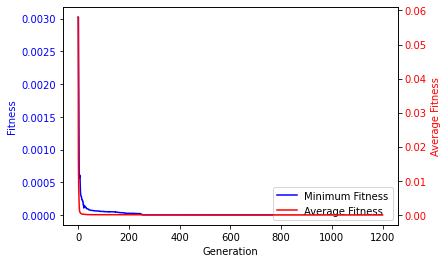

Best individual is Individual('d', [-3.141567826514142, 3.1418377673579316, -3.137871724950529, -3.141299540226859, 3.141435172230908, -3.141908983945701, -3.1414673749416617, -3.142698011275012, -3.1401429359539623, 3.1409348281567797]), fitness: (1.2123619788139838e-09,)
gen	nevals	avg      	std    	min       	max     
0  	30    	0.0971283	0.13467	0.00177986	0.471794
1  	173   	0.0371381	0.0678801	0.00230338	0.360748
2  	182   	0.00792964	0.00535202	0.00153368	0.0200067
3  	177   	0.00429125	0.00212555	0.000603191	0.013009 
4  	181   	0.00227223	0.00120561	0.000603191	0.005122 
5  	183   	0.00139311	0.00061693	0.000603191	0.00340149
6  	178   	0.000906488	0.000224438	0.000587928	0.00144663
7  	176   	0.000691107	0.000182658	0.00039331 	0.00112983
8  	165   	0.000504801	0.000105394	0.000391097	0.000734816
9  	184   	0.000422495	6.1011e-05 	0.000285341	0.000542022
10 	183   	0.000351865	5.10193e-05	0.000201038	0.000442218
11 	184   	0.000289662	5.1857e-05 	0.000187385	0.000391097
12 	1

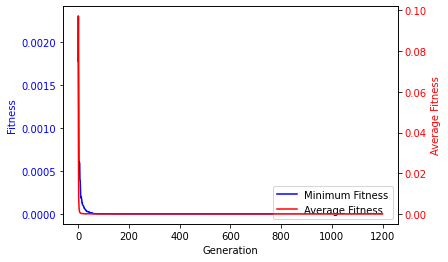

Best individual is Individual('d', [3.141065528136638, 3.1417860345925726, 3.1409472571833223, 21.98968328525256, -3.1423393556951433, 3.141422748009185, -3.1407630245345253, -3.141328217674291, 3.141544819954542, 3.141468911714768]), fitness: (2.7637003677994833e-10,)
gen	nevals	avg      	std      	min       	max     
0  	30    	0.0469944	0.0476679	0.00338443	0.161526
1  	182   	0.0127856	0.00897949	0.00178361	0.0306492
2  	177   	0.00565688	0.00335456	0.000609972	0.0179139
3  	188   	0.00313679	0.00168072	0.000609972	0.00806103
4  	183   	0.00157886	0.000807479	0.000558384	0.00340623
5  	184   	0.000868296	0.000491117	0.000294596	0.00258203
6  	179   	0.000499416	0.000111582	0.000308761	0.000729848
7  	183   	0.000374149	9.64404e-05	0.00025669 	0.000648796
8  	182   	0.000297965	4.88441e-05	0.000191798	0.000419171
9  	174   	0.000252126	3.03082e-05	0.000191798	0.000342033
10 	178   	0.000221778	2.01636e-05	0.000191798	0.000260469
11 	182   	0.000196212	1.9481e-05 	0.000151341	0.00025

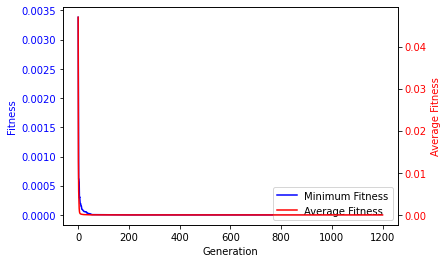

Best individual is Individual('d', [3.136430330706446, 3.1419789340706847, 3.143174385079028, -3.1403947004205826, 3.1413297236462987, -3.1416193517386106, -3.1428405138953983, -3.141589901723337, 3.14148765993946, 3.1420125408188704]), fitness: (2.2064072845362476e-09,)
gen	nevals	avg      	std      	min       	max     
0  	30    	0.0488243	0.0506945	0.00503033	0.253711
1  	177   	0.0171366	0.015516 	0.0045701 	0.0762879
2  	177   	0.00876075	0.00486306	0.00147109	0.0262707
3  	183   	0.00512578	0.00307814	0.00147109	0.0121949
4  	181   	0.00292112	0.00176754	0.00106418	0.00855821
5  	176   	0.00166144	0.000529852	0.000972773	0.00284279
6  	173   	0.00121775	0.000360504	0.000645298	0.0020015 
7  	174   	0.000919846	0.000307796	0.000475202	0.00158855
8  	184   	0.000629046	0.000158494	0.000384977	0.00111968
9  	189   	0.000491798	6.3602e-05 	0.000378268	0.000571368
10 	181   	0.000394317	4.87278e-05	0.000313503	0.000503685
11 	181   	0.000351195	2.71626e-05	0.000309333	0.000384977
12 	

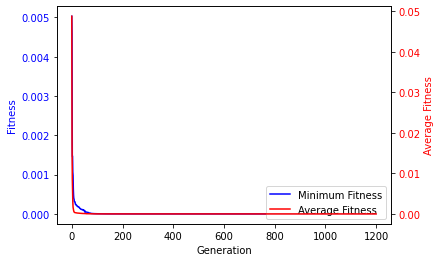

Best individual is Individual('d', [-3.142001092415961, -3.140978622113775, -3.143065499386028, -3.1417075997713466, -3.1423803333874964, -3.1425129526846924, 3.1429644378856576, -3.1421501985264126, -3.1403810005782846, 3.141689922504097]), fitness: (5.334719963764665e-10,)


In [10]:
def main():
    random.seed()
    MU, LAMBDA = 30, 200
    pop = toolbox.population(n=MU)
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", numpy.mean)
    stats.register("std", numpy.std)
    stats.register("min", numpy.min)
    stats.register("max", numpy.max)
    
    pop, logbook = algorithms.eaMuCommaLambda(pop, toolbox, mu=MU, lambda_=LAMBDA, 
        cxpb=0.6, mutpb=0.3, ngen=1200, stats=stats, halloffame=hof, verbose=True)

    gen, fit_mins, size_avgs  = logbook.select("gen", "min", "avg")

    fig, ax1 = plt.subplots()
    line1 = ax1.plot(gen, fit_mins, "b-", label="Minimum Fitness")
    ax1.set_xlabel("Generation")
    ax1.set_ylabel("Fitness", color="b")
    for tl in ax1.get_yticklabels():
      tl.set_color("b")

    ax2 = ax1.twinx()
    line2 = ax2.plot(gen, size_avgs, "r-", label="Average Fitness")
    ax2.set_ylabel("Average Fitness", color="r")
    for tl in ax2.get_yticklabels():
      tl.set_color("r")

    lns = line1 + line2
    labs = [l.get_label() for l in lns]
    ax1.legend(lns, labs, loc="lower right", frameon=True)

    plt.show()  

    print("Best individual is %s, fitness: %s" % (hof[0], hof[0].fitness.values))    


    return pop, logbook, hof
    
if __name__ == "__main__":
    for i in range(5):
       main()